# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="-MIDS---w261-Machine-Learning-At-Scale--1" href="#-MIDS---w261-Machine-Learning-At-Scale-"><span class="toc-item-num">1&nbsp;&nbsp;</span> MIDS - w261 Machine Learning At Scale </a></div><div class="lev2 toc-item"><a data-toc-modified-id="Assignment---HW10-11" href="#Assignment---HW10"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Assignment - HW10</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Instructions-2" href="#Instructions"><span class="toc-item-num">2&nbsp;&nbsp;</span>Instructions</a></div><div class="lev2 toc-item"><a data-toc-modified-id="IMPORTANT-21" href="#IMPORTANT"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>IMPORTANT</a></div><div class="lev3 toc-item"><a data-toc-modified-id="===-INSTRUCTIONS-for-SUBMISSIONS-===-211" href="#===-INSTRUCTIONS-for-SUBMISSIONS-==="><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>=== INSTRUCTIONS for SUBMISSIONS ===</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Useful-References-3" href="#Useful-References"><span class="toc-item-num">3&nbsp;&nbsp;</span>Useful References</a></div><div class="lev1 toc-item"><a data-toc-modified-id="HW-Problems-4" href="#HW-Problems"><span class="toc-item-num">4&nbsp;&nbsp;</span>HW Problems</a></div><div class="lev1 toc-item"><a data-toc-modified-id="HW10.1-WordCount-plus-sorting-5" href="#HW10.1-WordCount-plus-sorting"><span class="toc-item-num">5&nbsp;&nbsp;</span>HW10.1 WordCount plus sorting</a></div><div class="lev1 toc-item"><a data-toc-modified-id="HW10.1.1-6" href="#HW10.1.1"><span class="toc-item-num">6&nbsp;&nbsp;</span>HW10.1.1</a></div><div class="lev1 toc-item"><a data-toc-modified-id="HW10.2:-MLlib-centric-KMeans-7" href="#HW10.2:-MLlib-centric-KMeans"><span class="toc-item-num">7&nbsp;&nbsp;</span>HW10.2: MLlib-centric KMeans</a></div><div class="lev1 toc-item"><a data-toc-modified-id="HW10.3:-Homegrown-KMeans-in-Spark-8" href="#HW10.3:-Homegrown-KMeans-in-Spark"><span class="toc-item-num">8&nbsp;&nbsp;</span>HW10.3: Homegrown KMeans in Spark</a></div><div class="lev1 toc-item"><a data-toc-modified-id="HW10.4:-KMeans-Experiments-9" href="#HW10.4:-KMeans-Experiments"><span class="toc-item-num">9&nbsp;&nbsp;</span>HW10.4: KMeans Experiments</a></div><div class="lev1 toc-item"><a data-toc-modified-id="HW10.4.1:-Making-Homegrown-KMeans-more-efficient-10" href="#HW10.4.1:-Making-Homegrown-KMeans-more-efficient"><span class="toc-item-num">10&nbsp;&nbsp;</span>HW10.4.1: Making Homegrown KMeans more efficient</a></div><div class="lev3 toc-item"><a data-toc-modified-id="HINT:-have-a-look-at--this-linear-regression-notebook-1001" href="#HINT:-have-a-look-at--this-linear-regression-notebook"><span class="toc-item-num">10.0.1&nbsp;&nbsp;</span>HINT: have a look at  <a target="_blank" href="http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/atzqkc0p1eajuz6/LinearRegression-Notebook-Challenge.ipynb">this linear regression notebook</a></a></div>

In [7]:
%%javascript
/**********************************************************************************************
Known Mathjax Issue with Chrome - a rounding issue adds a border to the right of mathjax markup
https://github.com/mathjax/MathJax/issues/1300
A quick hack to fix this based on stackoverflow discussions: 
http://stackoverflow.com/questions/34277967/chrome-rendering-mathjax-equations-with-a-trailing-vertical-line
**********************************************************************************************/

$('.math>span').css("border-left-color","transparent")

<IPython.core.display.Javascript object>

In [2]:
%reload_ext autoreload
%autoreload 2

<h1> MIDS - w261 Machine Learning At Scale </h1>

<h2>Project 10</h2>


---
__Name:__  Hyera Moon      
__Week:__   10


# Useful References

* Karau, Holden, Konwinski, Andy, Wendell, Patrick, & Zaharia, Matei. (2015). Learning Spark: Lightning-fast big data analysis. Sebastopol, CA: O’Reilly Publishers.
* Hastie, Trevor, Tibshirani, Robert, & Friedman, Jerome. (2009). The elements of statistical learning: Data mining, inference, and prediction (2nd ed.). Stanford, CA: Springer Science+Business Media. (Download for free [here](http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf))

# HW Problems

# HW10.0: Short answer questions


__What is Apache Spark and how is it different to Apache Hadoop? __

Similarly to Apache Hadoop, Apache Spark is a distributed computing framework to handle big data processing and is compatible with Apache Hadoop. However, Spark is an in-memory cluster computing system and thus, is much faster than Hadoop (up to 10× faster on disk, 100× in memory) and also more usable and more expressive than Hadoop with 2 to 5 times less codes required, rich APIs, many built-in operators, lazy evaluation and an interactive shell.

__Fill in the blanks:__  
<hr>
   
__Spark API consists of interfaces to develop applications based on it in Java, ___ Scala and Python ___ languages (list languages). __

__Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or ___ YARN ___ in a distributed manner. __

<hr>

__What is an RDD and show a fun example of creating one and bringing the first element back to the driver program. __

An RDD (Resilient Distributed Datasets) is a fundamental data structure of Spark with the following points:  
- RDD is immutable and distributed collection of records. 
- Each dataset in RDD is divided into logical partitions, which may be computed on different nodes of the cluster.
- Lazy evaluation: RDD is not materialized until an action is called (contains information to rebuild a data set from stable storage)
- RDD can be cached for future reuse
- RDD is created by parallelizing an existing collection in your driver program, or referencing a dataset in an external storage system

In [22]:
# Example of RDD and bringing the first element back to the driver program

# Select five numbers between 1-69 and one Powerball number between 1-26
import numpy as np
powerball = np.random.randint(1,30,1)
print powerball
numbers = np.random.randint(1,70,5)
print numbers
lottery_numbers = np.append(powerball,numbers)

# 1. Create RDD by parallelizing
exampleRDD = sc.parallelize(lottery_numbers)

# 2. Bring first element of RDD
exampleRDD.first()  #powerball number!

[17]
[30 36 58  3 61]


17

# HW10.1 WordCount plus sorting

The following notebooks will be useful to jumpstart this collection of Homework exercises:


* [Example Notebook with Debugging tactics in Spark](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/jqjllp8kmf1eolk/WordCountDebugging-Example.ipynb)
* [Word Count Quiz](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/vgmpivsi4rvqz0s/WordCountQuiz.ipynb)
* [Work Count Solution](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/dxv3dmp1vluuo8i/WordCountQuiz-Solution.ipynb)

---
In Spark write the code to count how often each word appears in a text document (or set of documents). Please use this homework document (with no solutions in it) as a the example document to run an experiment.  Report the following: 
* provide a sorted list of tokens in decreasing order of frequency of occurence limited to [top 20 most frequent only] and [bottom 10 least frequent]. 


__OPTIONAL__ 
Feel free to do a secondary sort where words with the same frequncy are sorted alphanumerically increasing. Please refer to the [following notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/uu5afr3ufpm9fy8/SecondarySort.ipynb)
 for examples of secondary sorts in Spark. Please provide the following [top 20 most frequent terms only] and [bottom 10 least frequent terms]

__NOTE__ [Please incorporate all referenced notebooks directly into this master notebook as cells for HW submission. I.e., HW submissions should comprise of just one notebook]__

In [53]:
# START STUDENT CODE 10.1
# (ADD CELLS AS NEEDED)


### Start Spark

In [3]:
import os
import sys
spark_home = os.environ['SPARK_HOME'] = '/usr/lib/spark2/spark-2.0.0-bin-hadoop2.6'
if not spark_home:
    raise ValueError('SPARK_HOME enviroment variable is not set')
sys.path.insert(0,os.path.join(spark_home,'python'))
sys.path.insert(0,os.path.join(spark_home,'python/lib/py4j-0.10.1-src.zip'))
execfile(os.path.join(spark_home,'python/pyspark/shell.py'))

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.0.0
      /_/

Using Python version 2.7.12 (default, Jul  2 2016 17:42:40)
SparkSession available as 'spark'.


In [36]:
text_file = sc.textFile('MIDS-W261-HW-10-TEMPLATE.ipynb')

In [9]:
text_file.count()

562

In [12]:
text_file.take(5)

[u'{',
 u' "cells": [',
 u'  {',
 u'   "cell_type": "markdown",',
 u'   "metadata": {']

In [50]:
import re

def splitWords(line):
    line = re.sub(u'[^A-Za-z0-9 ]+', '', line)
    #line = re.sub(u'[^A-Za-z0-9]+', ' ', line) 
    return line.strip().split()


wordcounts = text_file.flatMap(splitWords) \
                .map(lambda word: (word,1)) \
                .reduceByKey(lambda a, b: a + b)
sortedcounts = wordcounts.map(lambda x: (x[1], x[0])).sortByKey(ascending=False).collect()


print "Top 20 most frequent words:"
print '{:<10s}{:<30s}'.format("count", "word")
print '-' * 40
for word in sortedcounts[0:20]:
    print '{:<10s}{:<30s}'.format(str(word[0]), str(word[1]))

print ""
print "Bottom 10 least frequent words:"
print '{:<10s}{:<30s}'.format("count", "word")
print '-' * 40
for word in sortedcounts[:-11:-1]:
    print '{:<10s}{:<30s}'.format(str(word[0]), str(word[1]))

Top 20 most frequent words:
count     word                          
----------------------------------------
122       n                             
77        the                           
37        and                           
36        of                            
35        metadata                      
33        celltype                      
33        source                        
31        in                            
29        a                             
23        code                          
23        to                            
20        this                          
20        STUDENT                       
20        CODE                          
20        markdown                      
19        for                           
18        true                          
18        tocitema                      
17        with                          
14        as                            

Bottom 10 least frequent words:
count     word                       

In [ ]:
# END STUDENT CODE 10.1

# HW10.1.1

Modify the above word count code to count words that begin with lower case letters (a-z) and report your findings. Again sort the output words in decreasing order of frequency.


In [58]:
# START STUDENT CODE 10.1.1
# (ADD CELLS AS NEEDED)



In [51]:
# Note: word[0] for first letter of the word
wordcounts2 = text_file.flatMap(splitWords) \
                .filter(lambda word: word[0].islower() )  \
                .map(lambda word: (word,1)) \
                .reduceByKey(lambda a, b: a + b)
sortedcounts2 = wordcounts2.map(lambda x: (x[1], x[0])).sortByKey(ascending=False).collect()


print "Top 20 most frequent words:"
print '{:<10s}{:<30s}'.format("count", "word")
print '-' * 40
for word in sortedcounts2[0:20]:
    print '{:<10s}{:<30s}'.format(str(word[0]), str(word[1]))

print ""
print "Bottom 10 least frequent words:"
print '{:<10s}{:<30s}'.format("count", "word")
print '-' * 40
for word in sortedcounts2[:-11:-1]:
    print '{:<10s}{:<30s}'.format(str(word[0]), str(word[1]))

Top 20 most frequent words:
count     word                          
----------------------------------------
122       n                             
77        the                           
37        and                           
36        of                            
35        metadata                      
33        celltype                      
33        source                        
31        in                            
29        a                             
23        code                          
23        to                            
20        this                          
20        markdown                      
19        for                           
18        true                          
18        tocitema                      
17        with                          
14        as                            
14        classlev1                     
13        collapsed                     

Bottom 10 least frequent words:
count     word                       

In [ ]:
# END STUDENT CODE 10.1.1

# HW10.2: MLlib-centric KMeans

Using the following  MLlib-centric KMeans code snippet: 

<pre>
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt


# Load and parse the data
# NOTE  kmeans_data.txt is available here 
#          https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 
data = sc.textFile("kmeans_data.txt")  
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10,
        runs=10, initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

# Save and load model
clusters.save(sc, "myModelPath")
sameModel = KMeansModel.load(sc, "myModelPath")

</pre>

__NOTE__ <p> The  __kmeans_data.txt__ is available here https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 

__TASKS__
* Run this code snippet and list the clusters that your find.
* compute the Within Set Sum of Squared Errors for the found clusters. Comment on your findings.

In [61]:
# START STUDENT CODE 10.2
# (ADD CELLS AS NEEDED)



In [52]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

In [53]:
# Load and parse the data
data = sc.textFile("kmeans_data.txt")  
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

In [54]:
# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10,
        runs=10, initializationMode="random")

/usr/lib/spark2/spark-2.0.0-bin-hadoop2.6/python/pyspark/mllib/clustering.py:347: UserWarning: The param `runs` has no effect since Spark 2.0.0.
  warnings.warn("The param `runs` has no effect since Spark 2.0.0.")


In [55]:
# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))  # Note: the sqrt is kept in this example but it seems more usual
                                                        # that it is not in the WSSSE formula.

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

Within Set Sum of Squared Error = 0.692820323028


In [59]:
# Print clusters centers for each point
print '{:<20s}{:<20s}'.format("center", "point")
print '{:<20s}{:<20s}'.format("-"*10, "-"*10)

results = parsedData.map(lambda x: (clusters.centers[clusters.predict(x)], x)).collect()
for center, point in results:
    print '{:<20s}{:<20s}'.format(str(center), str(point))

center              point               
----------          ----------          
[ 0.1  0.1  0.1]    [ 0.  0.  0.]       
[ 0.1  0.1  0.1]    [ 0.1  0.1  0.1]    
[ 0.1  0.1  0.1]    [ 0.2  0.2  0.2]    
[ 9.1  9.1  9.1]    [ 9.  9.  9.]       
[ 9.1  9.1  9.1]    [ 9.1  9.1  9.1]    
[ 9.1  9.1  9.1]    [ 9.2  9.2  9.2]    


In [60]:
# Save and load model
clusters.save(sc, "myModelPath")
sameModel = KMeansModel.load(sc, "myModelPath")

Observations:

From the 6 points in the dataset, there are 2 clusters formed with centers [0.1, 0.1, 0.1] and [9.1, 9.1, 9.1]. Each cluster comprises of 3 datapoints. As expected, the centroids are centered within the 3 datapoints set, i.e., this minimizes the Euclidean distance between the datapoints and the centroids within the same cluster.

The WSSSE (Within Set Sum of Squared Errors) is the sum of distance functions of each point in the cluster to the K centroid and thus measures how close the points in a cluster are to the centroids. Note in this example, the formula of WSSSE has a "sqrt" (square root) but typically there is no square root in the formula. For 10.3 and 10.4, the WSSSE formula with no square root is used.

In [ ]:
# END STUDENT CODE 10.2

# HW10.3: Homegrown KMeans in Spark 

Download the following KMeans [notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb).

Generate 3 clusters with 100 (one hundred) data points per cluster (using the code provided). Plot the data.
Then run MLlib's Kmean implementation on this data  and report your results as follows:

* plot the resulting clusters after 1 iteration, 10 iterations, after 20 iterations, after 100 iterations.
* in each plot please report the Within Set Sum of Squared Errors for the found clusters (as part of the title WSSSE). Comment on the progress of this measure as  the KMEans algorithms runs for more iterations. Then plot the WSSSE as a function of the iteration (1, 10, 20, 30, 40, 50, 100).



In [1]:
# START STUDENT CODE 10.3
# (ADD CELLS AS NEEDED)



In [6]:
# Generate 3 clusters with 100 data points per cluster
%matplotlib inline
import numpy as np
import pylab 
import json
size1 = size2 = size3 = 100
samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = np.append(data,samples3, axis=0)
# Randomlize data
data = data[np.random.permutation(size1+size2+size3),]
np.savetxt('data.csv',data,delimiter = ',')

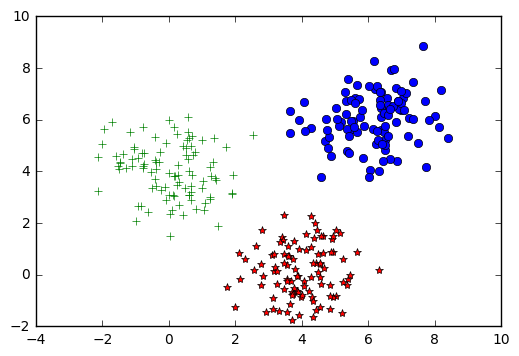

In [7]:
# Visualize generated data
pylab.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
pylab.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
pylab.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')
pylab.show()


Number of iterations: 1
Centroids: [array([ 5.25098131,  5.69207147]), array([ 6.86064046,  5.94682211]), array([ 1.93237591,  2.10230686])]


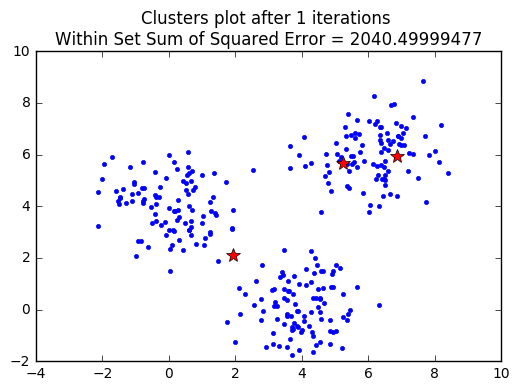


Number of iterations: 10
Centroids: [array([ 0.03893101,  4.03131968]), array([ 3.97009928,  0.13310186]), array([ 6.14085619,  6.01851459])]


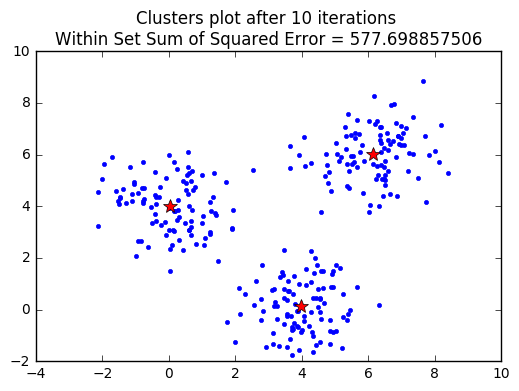


Number of iterations: 20
Centroids: [array([ 6.14085619,  6.01851459]), array([ 0.03893101,  4.03131968]), array([ 3.97009928,  0.13310186])]


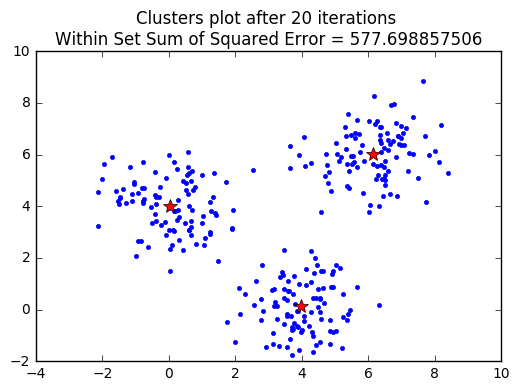


Number of iterations: 100
Centroids: [array([ 0.03893101,  4.03131968]), array([ 6.14085619,  6.01851459]), array([ 3.97009928,  0.13310186])]


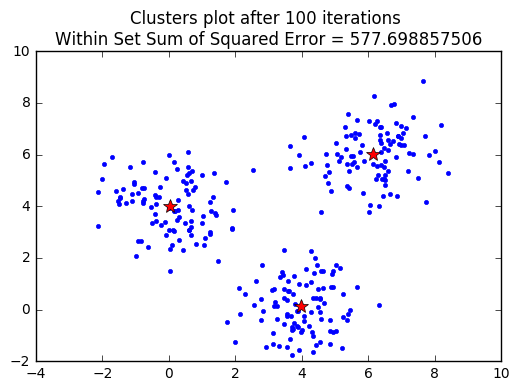

In [8]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt


# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    #return sqrt(sum([x**2 for x in (point - center)]))
    return sum([x**2 for x in (point - center)])  # Removed sqrt from formula
    
# Plot clusters with centroids with WSSSSE in the title
def plot_iteration(i, means, wssse_title):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.title("Clusters plot after " + str(i) + " iterations \n" + wssse_title)
    pylab.show()

    
# Load and parse the data
data = sc.textFile("data.csv")  
parsedData = data.map(lambda line: array([float(x) for x in line.split(',')]))

k = 3  # number of clusters
iterations = [1, 10, 20 ,100]

for i in iterations:
    print ""
    print "Number of iterations:", i
    
    # Build the model (cluster the data)
    clusters = KMeans.train(parsedData, k, maxIterations=i,
         initializationMode="random")
    
    # Evaluate clustering by computing Within Set Sum of Squared Errors
    WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    wssse_title = "Within Set Sum of Squared Error = " + str(WSSSE)
    
    # Print clusters centers
    centroids = clusters.clusterCenters
    print "Centroids:", str(centroids)

    # Plot the resulting clusters
    plot_iteration(i, centroids, wssse_title)
    
    

Findings:  
The WSSSE decreases significantly from 1 iteration to 10 iterations but does not changes after 10 iterations. This can also see seen in the plots: the centroids resulting from 1 iterations are not in the center of the clusters whereas the centroids resulting from 10 iterations are in the center of the clusters.

Note: the default epsilon for the kMeans model is set at 0.0001, thus, once the Euclidean distance between the previous iteration centroids and current iteration centroids is less than epsilon, the iteration stops since the center will be considered to have converged.

#### Plot the WSSSE as a function of the iteration (1, 10, 20, 30, 40, 50, 100)


Number of iterations: 1
Within Set Sum of Squared Error = 1791.79449603
Centroids: [array([ 5.03385126,  3.19285025]), array([ 7.28720731,  6.31567424]), array([ 0.73953818,  2.98515384])]

Number of iterations: 10
Within Set Sum of Squared Error = 577.698857506
Centroids: [array([ 3.97009928,  0.13310186]), array([ 6.14085619,  6.01851459]), array([ 0.03893101,  4.03131968])]

Number of iterations: 20
Within Set Sum of Squared Error = 577.698857506
Centroids: [array([ 3.97009928,  0.13310186]), array([ 6.14085619,  6.01851459]), array([ 0.03893101,  4.03131968])]

Number of iterations: 30
Within Set Sum of Squared Error = 577.698857506
Centroids: [array([ 6.14085619,  6.01851459]), array([ 0.03893101,  4.03131968]), array([ 3.97009928,  0.13310186])]

Number of iterations: 40
Within Set Sum of Squared Error = 577.698857506
Centroids: [array([ 6.14085619,  6.01851459]), array([ 0.03893101,  4.03131968]), array([ 3.97009928,  0.13310186])]

Number of iterations: 50
Within Set Sum of Sq

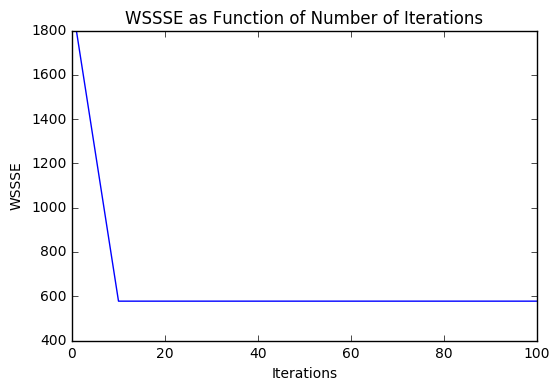

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

k = 3  # number of clusters
iterations = [1, 10, 20, 30, 40, 50, 100]
wssse_list = []

for i in iterations:
    print ""
    print "Number of iterations:", i
    
    # Build the model (cluster the data)
    clusters = KMeans.train(parsedData, k, maxIterations=i,
         initializationMode="random")
    
    # Evaluate clustering by computing Within Set Sum of Squared Errors
    WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print "Within Set Sum of Squared Error = " + str(WSSSE)
    wssse_list.append(float(WSSSE))
    
    # Print clusters centers
    centroids = clusters.clusterCenters
    print "Centroids:", str(centroids)


plt.plot(iterations, wssse_list)
plt.title("WSSSE as Function of Number of Iterations")
plt.xlabel("Iterations")
plt.ylabel("WSSSE")
plt.show()

In [ ]:
# END STUDENT CODE 10.3

# HW10.4: KMeans Experiments

Using this provided [homegrown Kmeans code](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb)   repeat the experiments in HW10.3. Explain any differences between the results in HW10.3 and HW10.4. 

In [65]:
# START STUDENT CODE 10.4
# (ADD CELLS AS NEEDED)



In [10]:
%matplotlib inline
import numpy as np
import pylab 

# Calculate which class each data point belongs to
def nearest_centroid(line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    return (closest_centroid_idx,(x,1))

# Plot centroids and data points for each iteration
def plot_iteration(i,means,wssse_title):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.title("Clusters plot after " + str(i) + " iterations \n" + wssse_title)
    pylab.show()
    
# Evaluate clustering by computing Within Set Sum of Squared Errors
def sqError(line):
    center = centroids[nearest_centroid(line)[0]]
    point = np.array([float(f) for f in line.split(',')])
    return sum([x**2 for x in (point - center)])



Scenario: 1 iterations
--------------------
Iteration1
[[ 1.0364024   0.52001947]
 [ 4.09864764  2.70097356]
 [ 1.91369195  5.65539792]]


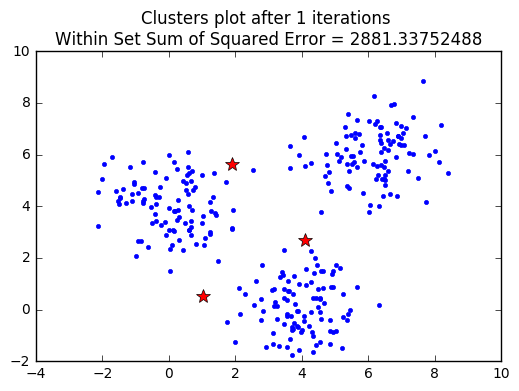


Scenario: 10 iterations
--------------------
Iteration1
[[ 1.0364024   0.52001947]
 [ 4.09864764  2.70097356]
 [ 1.91369195  5.65539792]]
Iteration2
[[ 2.09378629  0.74408028]
 [ 5.3936817   3.16743134]
 [ 1.82587832  5.27859227]]
Iteration3
[[ 3.2003897   0.26735276]
 [ 6.03453025  5.1608877 ]
 [ 0.3157577   4.45342164]]
Iteration4
[[ 3.9455604   0.15064685]
 [ 6.14085619  6.01851459]
 [ 0.02425685  4.05279618]]
Iteration5
[[ 3.97009928  0.13310186]
 [ 6.14085619  6.01851459]
 [ 0.03893101  4.03131968]]


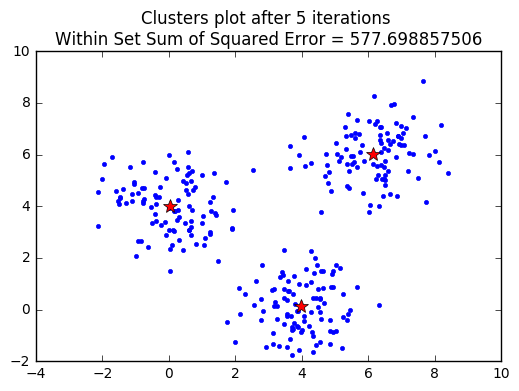


Scenario: 20 iterations
--------------------
Iteration1
[[ 1.0364024   0.52001947]
 [ 4.09864764  2.70097356]
 [ 1.91369195  5.65539792]]
Iteration2
[[ 2.09378629  0.74408028]
 [ 5.3936817   3.16743134]
 [ 1.82587832  5.27859227]]
Iteration3
[[ 3.2003897   0.26735276]
 [ 6.03453025  5.1608877 ]
 [ 0.3157577   4.45342164]]
Iteration4
[[ 3.9455604   0.15064685]
 [ 6.14085619  6.01851459]
 [ 0.02425685  4.05279618]]
Iteration5
[[ 3.97009928  0.13310186]
 [ 6.14085619  6.01851459]
 [ 0.03893101  4.03131968]]


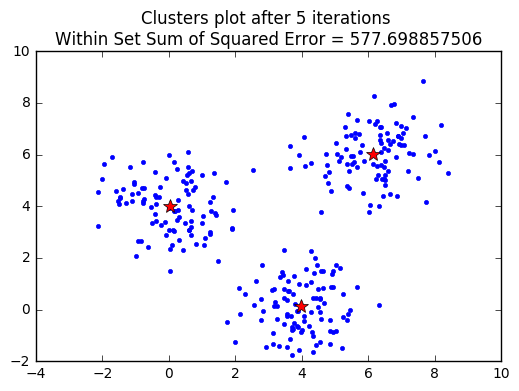


Scenario: 100 iterations
--------------------
Iteration1
[[ 1.0364024   0.52001947]
 [ 4.09864764  2.70097356]
 [ 1.91369195  5.65539792]]
Iteration2
[[ 2.09378629  0.74408028]
 [ 5.3936817   3.16743134]
 [ 1.82587832  5.27859227]]
Iteration3
[[ 3.2003897   0.26735276]
 [ 6.03453025  5.1608877 ]
 [ 0.3157577   4.45342164]]
Iteration4
[[ 3.9455604   0.15064685]
 [ 6.14085619  6.01851459]
 [ 0.02425685  4.05279618]]
Iteration5
[[ 3.97009928  0.13310186]
 [ 6.14085619  6.01851459]
 [ 0.03893101  4.03131968]]


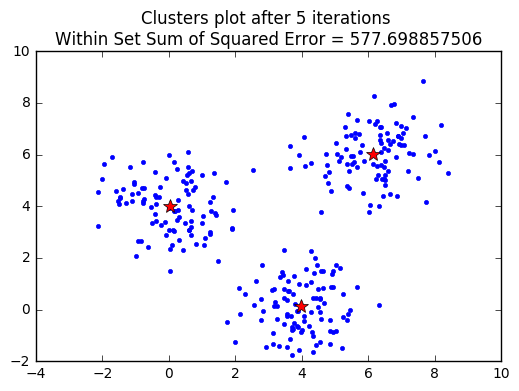

total run time: 5.51 seconds


In [11]:
import time

start_time = time.time()

K = 3  # number of clusters

D = sc.textFile("data.csv").cache()

iterations = [1, 10, 20 ,100]
for iteration in iterations:
    # Initialization: initialization of parameter is fixed to show an example
    centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])  # 3 centroids since K = 3
    
    print ""
    print "Scenario:", iteration, "iterations"
    print "-" * 20
    iter_num = 0
    for i in range(iteration):  
        res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
        #res [(0, (array([  2.66546663e+00,   3.94844436e+03]), 1001)), 
        #     (2, (array([ 6023.84995923,  5975.48511018]), 1000)), 
        #     (1, (array([ 3986.85984761,    15.93153464]), 999))]
        # res[1][1][1] returns 1000 here
        res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID
        centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size

        if np.sum(np.absolute(centroids_new-centroids))<0.01:
            break
            
        iter_num = iter_num + 1
        print "Iteration" + str(iter_num)
        
        centroids = centroids_new
        print centroids
    
    # Evaluate clustering by computing Within Set Sum of Squared Errors
    WSSSE = D.map(sqError).reduce(lambda x, y: x + y)
    wssse_title = "Within Set Sum of Squared Error = " + str(WSSSE)
    
    # Plot clusters with WSSSE value in the title
    plot_iteration(iter_num,centroids, wssse_title)
    
stop_time = time.time()
print 'total run time: %0.2f seconds' %(stop_time - start_time)

#### Similarities and differences between the results in HW10.3 and HW10.4.

Based on preset initial centroids, the homegrown KMeans converges quickly after 6 iterations and thus, the results from 10, 20 and 100 iterations are the same. Similarly, even if the centroids are not preset but randomly chosen, the MLLib KMeans also converges for some iterations around 10 and the results from 10, 20 and 100 are the same. In addition, the WSSSE in both the homegrown implementation and MLLib are similar (around 2k for 1 iterations and 600 for 10+ iterations).

The difference in the homegrown KMeans and MLLib is the initialization of the centroids: unlike the homegrown KMeans centroids, the initial MLLib centroids cannot be set equal to pre-determined ones.

In [ ]:
# END STUDENT CODE 10.4

# HW10.4.1: Making Homegrown KMeans more efficient

The above provided homegrown KMeans implentation in not the most efficient. How can you make it more efficient? Make this change in the code and show it work and comment on the gains you achieve. 

### HINT: have a look at  [this linear regression notebook](    http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/atzqkc0p1eajuz6/LinearRegression-Notebook-Challenge.ipynb)

In [70]:
# START STUDENT CODE 10.4.1
# (ADD CELLS AS NEEDED)



In [12]:
%matplotlib inline
import numpy as np
import pylab 

# Calculate which class each data point belongs to
def nearest_centroid(line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((x - centroids.value)**2, axis=1).argmin()
    return (closest_centroid_idx,(x,1))

# Plot centroids and data points for each iteration
def plot_iteration(i,means,wssse_title):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.title("Clusters plot after " + str(i) + " iterations \n" + wssse_title)
    pylab.show()
    
# Evaluate clustering by computing Within Set Sum of Squared Errors
def sqError(line):
    center = centroids.value[nearest_centroid(line)[0]]
    point = np.array([float(f) for f in line.split(',')])
    return sum([x**2 for x in (point - center)])



Scenario: 1 iterations
--------------------
Iteration1
[[ 1.0364024   0.52001947]
 [ 4.09864764  2.70097356]
 [ 1.91369195  5.65539792]]


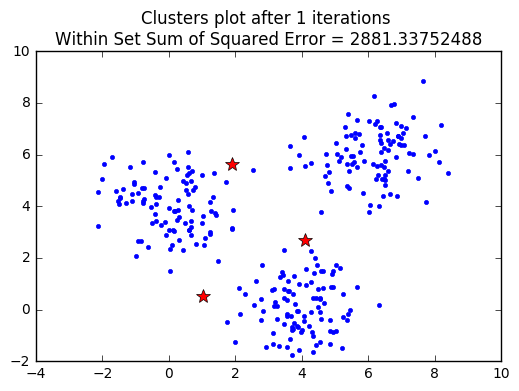


Scenario: 10 iterations
--------------------
Iteration1
[[ 1.0364024   0.52001947]
 [ 4.09864764  2.70097356]
 [ 1.91369195  5.65539792]]
Iteration2
[[ 2.09378629  0.74408028]
 [ 5.3936817   3.16743134]
 [ 1.82587832  5.27859227]]
Iteration3
[[ 3.2003897   0.26735276]
 [ 6.03453025  5.1608877 ]
 [ 0.3157577   4.45342164]]
Iteration4
[[ 3.9455604   0.15064685]
 [ 6.14085619  6.01851459]
 [ 0.02425685  4.05279618]]
Iteration5
[[ 3.97009928  0.13310186]
 [ 6.14085619  6.01851459]
 [ 0.03893101  4.03131968]]


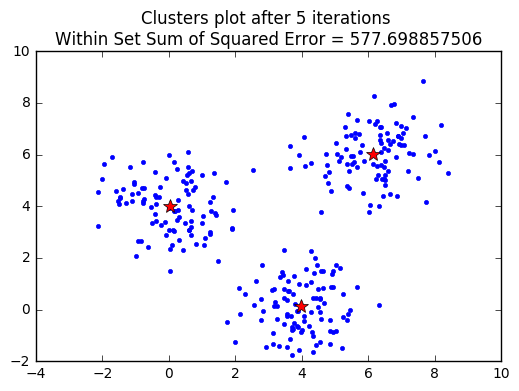


Scenario: 20 iterations
--------------------
Iteration1
[[ 1.0364024   0.52001947]
 [ 4.09864764  2.70097356]
 [ 1.91369195  5.65539792]]
Iteration2
[[ 2.09378629  0.74408028]
 [ 5.3936817   3.16743134]
 [ 1.82587832  5.27859227]]
Iteration3
[[ 3.2003897   0.26735276]
 [ 6.03453025  5.1608877 ]
 [ 0.3157577   4.45342164]]
Iteration4
[[ 3.9455604   0.15064685]
 [ 6.14085619  6.01851459]
 [ 0.02425685  4.05279618]]
Iteration5
[[ 3.97009928  0.13310186]
 [ 6.14085619  6.01851459]
 [ 0.03893101  4.03131968]]


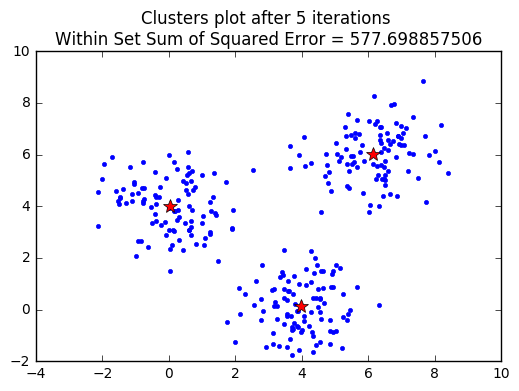


Scenario: 100 iterations
--------------------
Iteration1
[[ 1.0364024   0.52001947]
 [ 4.09864764  2.70097356]
 [ 1.91369195  5.65539792]]
Iteration2
[[ 2.09378629  0.74408028]
 [ 5.3936817   3.16743134]
 [ 1.82587832  5.27859227]]
Iteration3
[[ 3.2003897   0.26735276]
 [ 6.03453025  5.1608877 ]
 [ 0.3157577   4.45342164]]
Iteration4
[[ 3.9455604   0.15064685]
 [ 6.14085619  6.01851459]
 [ 0.02425685  4.05279618]]
Iteration5
[[ 3.97009928  0.13310186]
 [ 6.14085619  6.01851459]
 [ 0.03893101  4.03131968]]


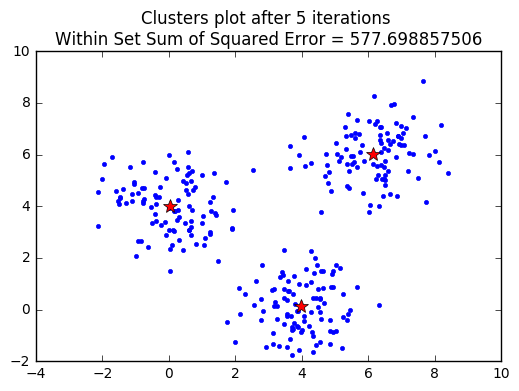

total run time: 5.64 seconds


In [13]:
import time
start_time = time.time()

K = 3  # number of clusters

D = sc.textFile("data.csv").cache()

iterations = [1, 10, 20 ,100]
for iteration in iterations:
    # Initialization: initialization of parameter is fixed to show an example
    centroids = sc.broadcast(np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]]))  # 3 centroids since K = 3
    
    print ""
    print "Scenario:", iteration, "iterations"
    print "-" * 20
    iter_num = 0
    for i in range(iteration):  
        res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
        #res [(0, (array([  2.66546663e+00,   3.94844436e+03]), 1001)), 
        #     (2, (array([ 6023.84995923,  5975.48511018]), 1000)), 
        #     (1, (array([ 3986.85984761,    15.93153464]), 999))]
        # res[1][1][1] returns 1000 here
        res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID
        centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size

        if np.sum(np.absolute(centroids_new-centroids.value))<0.01:
            break
            
        iter_num = iter_num + 1
        print "Iteration" + str(iter_num)
        
        print centroids_new
        centroids = sc.broadcast(centroids_new)
        
    
    # Evaluate clustering by computing Within Set Sum of Squared Errors
    WSSSE = D.map(sqError).reduce(lambda x, y: x + y)
    wssse_title = "Within Set Sum of Squared Error = " + str(WSSSE)
    
    # Plot clusters with WSSSE value in the title
    plot_iteration(iter_num,centroids.value, wssse_title)
    
stop_time = time.time()
print 'total run time: %0.2f seconds' %(stop_time - start_time)

To make the homegrown KMeans implementation more efficient, broadcasting the variable "centroids" has been added to the previous code. Instead of variables copied to each node which makes the tasks inefficient and increases communication costs, broadcast variable allow to keep a read-only variable cached on each machine rather than shipping a copy of it with tasks. They can be used, for example, to give every node a copy of a large input dataset in an efficient manner. Spark also attempts to distribute broadcast variables using efficient broadcast algorithms to reduce communication cost.

In this case, given the relatively small dataset and the small size of the variable centroids (only an array of 3 centroids with 2-dimensional features), the time performance has not improved but in case of larger dataset (i.e. more nodes/partitions) and larger variable, broadcasting this variable can significantly increase the performance by reducing network communication cost.

In [ ]:
# END STUDENT CODE 10.4.1